# Laboratorio 2 Inteligencia de negocios - Agrupación #

Grupo 17 - Miembros:


*   Juan Esteban Diaz Castro - 202121646 - Estudiante 1 - Kmeans
*   Jose Botello - 202022580
*   Samuel Ramirez - 202123423 - Estudiante 2 - Ward

In [ ]:
%pip install numpy
%pip install pandas
%pip install joblib
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy
%pip install jupyter

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin

import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


# 1. Carga de Datos

In [3]:
data = "./data/202510_Laboratorio 2 - Agrupación_Customer_Data.csv"

customers = pd.read_csv(data, sep=";", encoding="ISO-8859-1")

customer_df = customers.copy()

customer_df.shape

(8950, 18)

In [4]:
customer_df.sample(5)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
8401,C18402,4253.489746,0.453965,27845.601230,30820.684670,10554.962130,13647.78927,0.293184,0.829441,0.153671,1.230265,27,257,26438.143130,48105.35716,14019.26994,0.737167,11
8605,C18606,3755.260922,0.183214,30186.361530,34455.105620,3608.642166,12629.34381,0.455092,0.538263,0.833569,0.155558,77,75,17506.379390,26549.19406,32596.38019,0.856439,6
4850,C14851,11887.047010,0.687198,36080.365320,8200.172718,19166.214760,38636.14238,0.780566,0.195194,0.577383,1.018386,95,207,15576.417140,11752.41505,54331.60451,0.306856,10
1221,C11222,4116.389699,0.208017,31818.494170,34868.697550,2930.739184,13551.52435,0.520003,0.448092,0.867064,0.200247,89,76,15999.782260,23434.88430,36275.03281,0.779434,6
8670,C18671,16516.961310,0.239782,8832.458882,31073.538980,10617.525630,21459.91227,0.548941,0.643497,0.644806,1.018154,71,165,3692.540965,19091.68936,62965.07402,0.021708,8


In [5]:
customer_df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

# 2. Entendimiento de los Datos

2.1 Características de los Datos

Para nuestros datos numéricos vamos a utilziar describe para poder entenderlos

In [6]:
customer_df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Ahora utilizaremos value_counts() para poder ver nuestros datos categóricos

In [7]:
customer_df["ID"].value_counts()

ID
C18950    1
C10001    1
C10002    1
C10003    1
C10004    1
         ..
C10011    1
C10010    1
C10009    1
C10008    1
C10007    1
Name: count, Length: 8950, dtype: int64

2.2 Perfilamiento de los Datos

2.3 Análisis de Calidad de los Datos

2.3.1 Completitud

Revisaremos el porcentaje de celdas vacias para cada una de las columnas

In [8]:
df_porcentajes = (100*customer_df.isna().sum()/len(customer_df)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
PAGOS_MINIMOS,3.497207
LÍMITE_CREDITO,0.011173
SALDO,0.000000
ID,0.000000
F_SALDO,0.000000
COMPRAS,0.000000
AVANCE_EFECTIVO,0.000000
F_COMPRAS,0.000000
COMPRAS_PUNTUALES,0.000000
COMPRAS_PLAZOS,0.000000


In [9]:
filas_incompletas = customer_df[customer_df.isna().any(axis=1)]
filas_incompletas

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.18503,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
31,C10032,3310.590886,0.599920,31427.680340,29692.273750,9395.804625,12119.27183,0.241004,0.759244,0.192674,1.353220,28,307,27471.470630,42788.566250,NaN,0.748458,11
45,C10046,14893.094970,0.754369,43348.871500,7196.968679,20440.098640,36786.55161,0.758416,0.211381,0.501564,0.828791,89,183,16223.672510,8064.315833,NaN,0.377104,10
53,C10054,13030.318170,0.767215,41541.292300,4084.981848,19163.859250,37746.28868,0.854852,0.244613,0.493249,1.065783,97,244,11722.581050,12306.438970,NaN,0.433215,10
78,C10079,3514.910807,0.181879,28067.685300,35318.373000,2660.913729,12034.56947,0.451773,0.494646,0.791138,0.143462,80,65,17314.285730,28487.355700,NaN,0.866448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,C18923,2712.167972,0.282046,28536.331890,35580.354640,4425.331588,18613.02233,0.359371,0.575407,0.860808,0.408806,82,72,14918.052730,21416.015690,NaN,0.920035,6
8929,C18930,6039.746284,0.223305,32230.694630,34187.764740,3450.289051,10161.10731,0.467539,0.569357,0.810294,0.124760,80,97,13346.607000,26226.982450,NaN,0.816095,6
8934,C18935,3907.309029,0.229597,30254.878710,31994.886640,3183.752172,12765.06700,0.406941,0.659441,0.844801,0.276053,74,84,16760.975030,24010.894490,NaN,0.858690,6
8938,C18939,16551.038470,0.099458,8163.267932,33988.691350,10175.408990,16704.32565,0.603985,0.656120,0.750198,1.016616,46,146,1852.802394,17727.359190,NaN,0.165054,8


Vemos entonces que en las casillas de pagos mínimos y de límite crédito hay celdas vacias, lo ideal sería entonces eliminar estas celdas incompletas, porque si asignamos el valor promedio en cada una de estas vamos a afectar la agrupación ya que estariamos agrupando con datos predictivos.

In [10]:
def drop_empty(dataframe):

    dataframe.dropna(inplace=True)

    return

drop_empty(customer_df)

customer_df.shape

(8636, 18)

Revisando que se hayan eliminado las filas incompletas:

In [11]:
df_porcentajes = (100*customer_df.isna().sum()/len(customer_df)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
ID,0.0
SALDO,0.0
F_SALDO,0.0
COMPRAS,0.0
COMPRAS_PUNTUALES,0.0
COMPRAS_PLAZOS,0.0
AVANCE_EFECTIVO,0.0
F_COMPRAS,0.0
F_COMPRAS_PUNTUALES,0.0
F_COMPRAS_PLAZOS,0.0


El porcentaje de ausencia es de 0% en todas las filas, por lo que vemos que si se eliminaron las filas incompletas

2.3.2 Duplicidad

Revisaremos a continuación las filas duplicadas para posteriormente eliminarlas

In [36]:
df_duplicated = customer_df.loc[customer_df.duplicated(keep=False)]
df_duplicated

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,AVANCE_EFECTIVO,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE,Cluster_KMeans,Cluster_ward


No existen filas duplicadas, por lo que entonces podemos continuar con la consistencia de los datos

2.3.3 Consistencia

Como no tenemos ningun dato categorico podemos pasar a a la validez de los mismos. Esto dado a que ya eliminamos los datos vacios

2.3.4 Validez

Revisamos que los datos estén acorde a lo reportado en el diccionario de datos. Para estar aplicando el modelo de manera correcta 

In [13]:
customer_df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.734601,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.422409,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.230676,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.947896,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,1.028778,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observamos que el atributo F_AVANCE_EFECTIVO no está en los rangos reportados en el diccionario de datos. Ya que tiene un valor máximo de 1.5, lo cual está fuera del rango especificado. Para corregirlo escalamos los datos.

In [14]:
scaler = MinMaxScaler()

def escalar_atributo(data,atributos):
    data[atributos] = scaler.fit_transform(data[atributos])
    return

escalar_atributo(customer_df,['F_AVANCE_EFECTIVO'])

customer_df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.489734,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.281606,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.153784,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.631931,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,0.685852,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observamos como ya todos los valores se encuentran dentro de los rangos requeridos.

# 3 Preparación de los datos

Vamos a observar si todos los atributos son necesarios para nuestro algoritmo de agrupación. Para ello determinaremos la correlación que existe entre cada uno de ellos.

<Axes: >

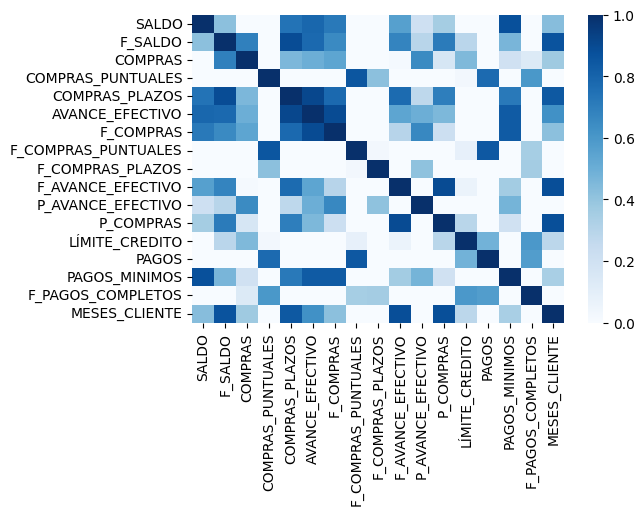

In [15]:
var = ["SALDO", "F_SALDO", "COMPRAS", "COMPRAS_PUNTUALES", "COMPRAS_PLAZOS","AVANCE_EFECTIVO", "F_COMPRAS", "F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS","F_AVANCE_EFECTIVO","P_AVANCE_EFECTIVO","P_COMPRAS","LÍMITE_CREDITO","PAGOS","PAGOS_MINIMOS","F_PAGOS_COMPLETOS","MESES_CLIENTE" ]

plt.figure(figsize=(6, 4))
sns.heatmap(customer_df[var].corr(), cmap="Blues", vmin=0, vmax=1)

Del grafico podemos observar como COMPRAS_PLAZOS, AVANCE_EFECTIVO, F_COMPRAS Están altamente correlacionadas por ende podria ser elegida una sola de las 3 variables. 


In [16]:
var = ["SALDO", "F_SALDO", "COMPRAS", "COMPRAS_PUNTUALES", "AVANCE_EFECTIVO","F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS","F_AVANCE_EFECTIVO","P_AVANCE_EFECTIVO","P_COMPRAS","LÍMITE_CREDITO","PAGOS","PAGOS_MINIMOS","F_PAGOS_COMPLETOS","MESES_CLIENTE" ]

customer_df = customer_df.drop(columns=[column for column in customer_df.columns if column not in var])


customer_df.sample(5)


,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,AVANCE_EFECTIVO,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
1346,13337.070370,0.861971,37460.158410,7964.823852,35317.98342,0.117679,0.518671,0.651559,87,257,13553.157840,11295.162130,48999.46119,0.367707,10
8158,15871.531930,0.129405,4223.349014,29798.479690,17891.76025,0.726319,0.646318,0.611113,42,155,3486.431834,17060.911990,58119.68858,0.197042,7
2319,12965.996510,0.874707,37120.580720,8042.368411,38075.11417,0.095609,0.473602,0.640904,99,215,12967.015910,7368.449536,57492.43728,0.355751,10
3408,4698.672865,0.179185,31335.891490,33236.142300,13865.51164,0.579001,0.854353,0.090609,74,133,16874.764530,23121.146810,27082.86176,0.805718,6
8343,4215.472523,0.545606,25099.755160,30944.479930,13328.19870,0.852706,0.193362,0.924749,31,258,27146.050040,41421.075130,26639.80626,0.841076,11


Verificamos nuevamente la correlación 

<Axes: >

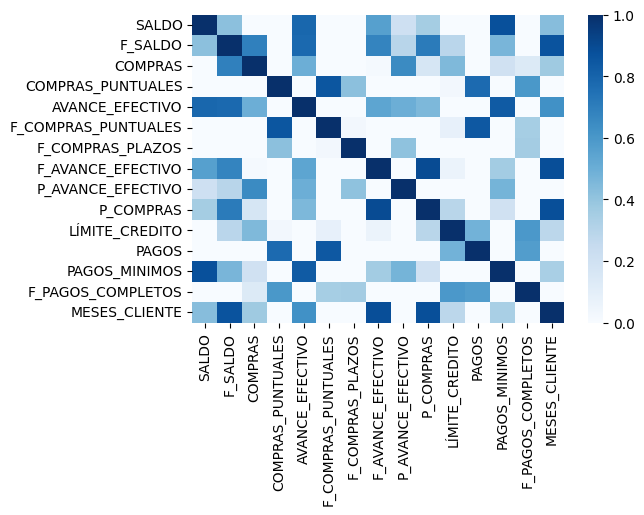

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(customer_df[var].corr(), cmap="Blues", vmin=0, vmax=1)

Ya no se encuentra una correlación fuerte entre más de dos variables. Por ende ya se dejan las que están

# 4 Modelado

Ya con los datos debidamente preparados podemos proceder a realizar los diferentes modelos de agrupación. Para este laboratorio se eligieron los modelos: Kmeans, Ward

# 4.1 Kmeans

Kmeans funciona por medio del establecimiento de unos centroides a los que se les va a calcular su distancia Euclídea con respecto a los elementos de los grupos que representa. A lo largo de las iteraciones, KMeans va a ajustando los centroides de los grupos haciendo que esten lo más centrados posible para el establecimiento de los grupos, conforme se van moviendo los centroides algunos elementos pueden cambiar de grupo pues ahora se encuentran más cercanos a otro centroide. KMeans se repite hasta que el centroide no cambia de posición y se tienen conformados los grupos.

Creamos y ajustamos nuestro modelo. Empezaremos con dos clusters para luego revisar si esta cantidad es la adecuada o no. Tomamos estos dos grupos como: CompradorFuerte y CompradorDebil. Despúes revisaremos si esta cantidad es la indicada, de lo contrario sacaremos el número de clusters ideal por medio del uso del método del codo. 

In [18]:
kmeans_clusters = KMeans(n_clusters=2)
kmeans_clusters.fit(customer_df)

KMeans(n_clusters=2)

Obtenemos las etiquetas

In [19]:
labels = kmeans_clusters.labels_
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

<Axes: xlabel='Cluster_KMeans'>

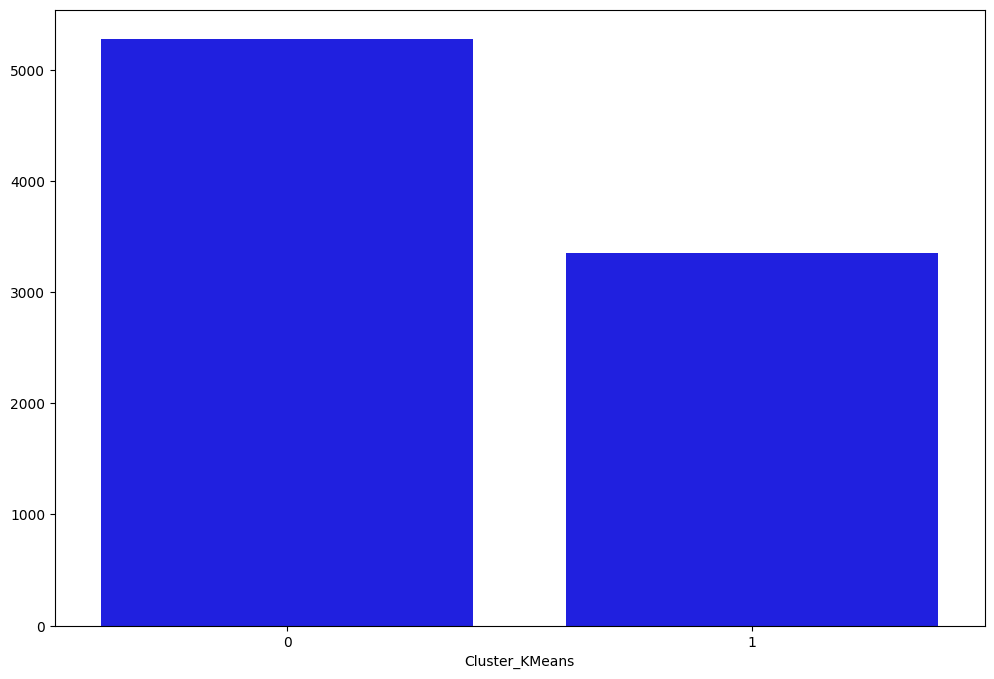

In [20]:
customer_df["Cluster_KMeans"] = labels

cluster_distrib_kmeans = customer_df["Cluster_KMeans"].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib_kmeans.index, y=cluster_distrib_kmeans.values, color='b')

Viendo los clusters, vemos que ambos clusters tienen cantidades parecidas de elementos. Por lo que por el momento se podría decir que dos grupos es suficiente, no obstante revisaremos más adelante con evidencia gráfica si 2 es el número indicado de grupos.

# 4.2 Ward

Se crea y ajusta el modelo

In [21]:
wardcluster = AgglomerativeClustering(n_clusters=3)
wardcluster.fit(customer_df)
labels = wardcluster.labels_


Se visualizan los resultados

<Axes: xlabel='Cluster_ward'>

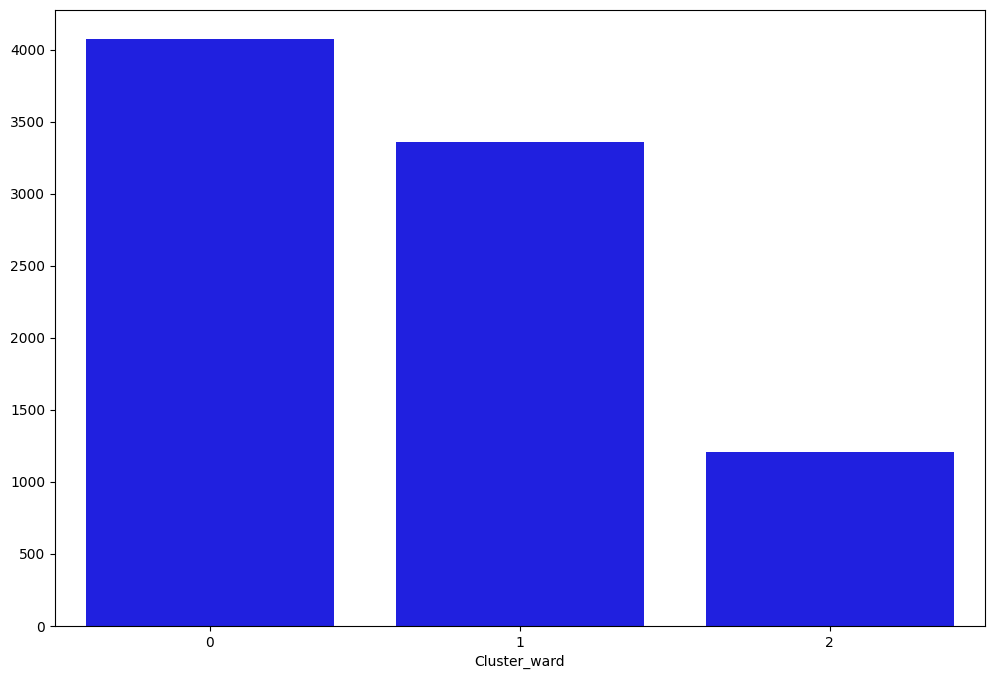

In [22]:
customer_df['Cluster_ward'] = labels

cluster_distrib_ward = customer_df['Cluster_ward'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib_ward.index, y=cluster_distrib_ward.values, color='b')



# 5. Análisis de Resultados

5.1 Kmeans

Viendo que kmeans con 2 clusters nos produce dos grupos con un número similar de elementos vamos a proceder a graficar los grupos para poder revisar si 2 grupos es ideal o si deberíamos tener un mayor número de grupos.

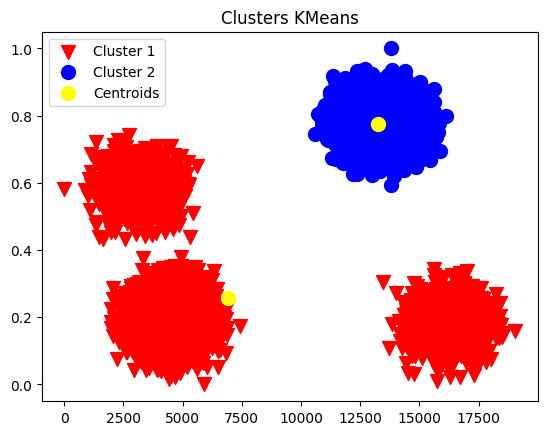

In [23]:
col = customer_df.to_numpy()

plt.scatter(col[kmeans_clusters.labels_ == 0, 0], col[kmeans_clusters.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(col[kmeans_clusters.labels_ == 1, 0], col[kmeans_clusters.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans_clusters.cluster_centers_[:, 0], kmeans_clusters.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters KMeans')
plt.legend()
plt.show()

Viendo el gráfico, el número de grupos no es el ideal porque hay 3 posibles grupos conformando uno solo. Por lo que deberiamos separar el cluster 1 en otros 3 grupos, teniendo entonces que deberiamos tener 4 grupos. Para revisar si debemos utilizar 4 grupos vamos a realizar un gráfico de codo para comprobar si 4 es el valor a utilizar.

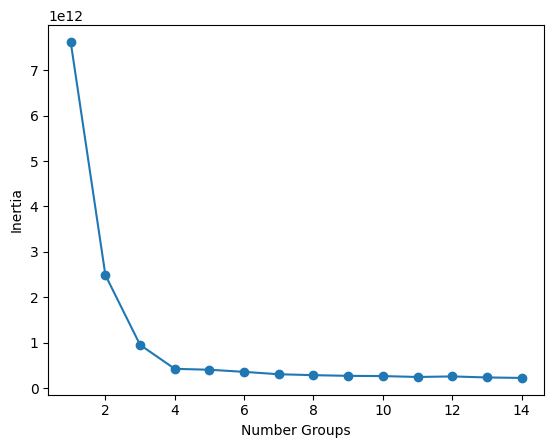

In [24]:
inertia = []
for i in range(1, 15):
    km = KMeans(n_clusters=i)
    km.fit(customer_df)
    inertia.append(km.inertia_)

plt.plot(range(1,15), inertia, marker='o')
plt.xlabel("Number Groups")
plt.ylabel("Inertia")
plt.show()

De acuerdo con el método del codo, deberiamos tener 4 clusters para kmeans, por lo que repetimos kmeans con 4 clusters y graficamos para ver el resultado:

In [25]:
kmeans_clusters_v2 = KMeans(n_clusters=4)
kmeans_clusters_v2.fit(customer_df)

KMeans(n_clusters=4)

In [26]:
labels = kmeans_clusters_v2.labels_
labels

array([1, 0, 1, ..., 3, 3, 1], dtype=int32)

<Axes: xlabel='Cluster_KMeans'>

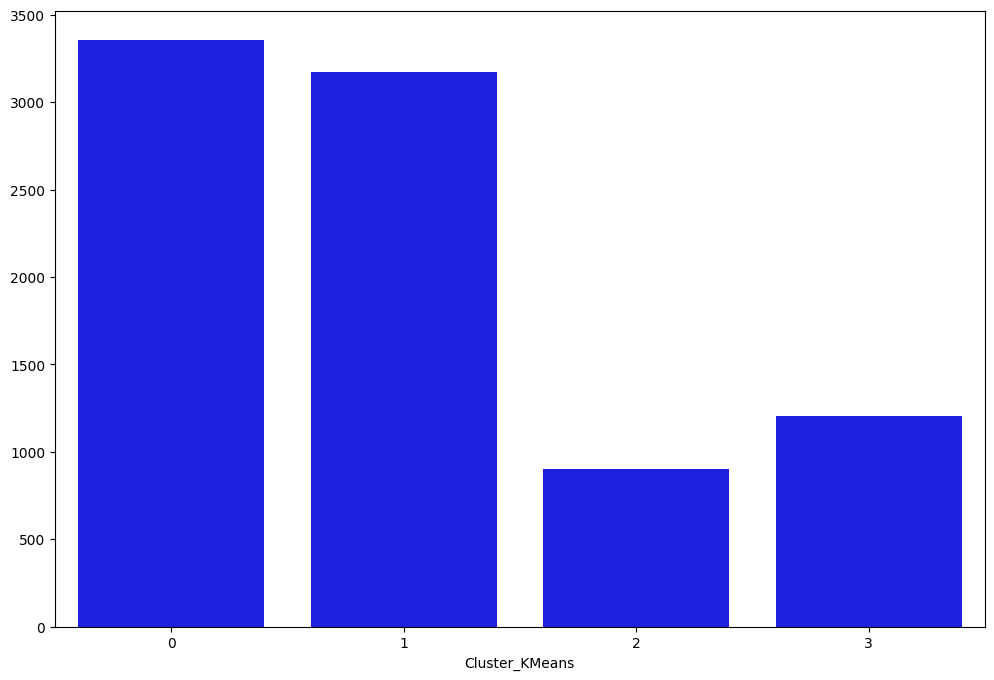

In [27]:
customer_df["Cluster_KMeans"] = labels

cluster_distrib_kmeans = customer_df["Cluster_KMeans"].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib_kmeans.index, y=cluster_distrib_kmeans.values, color='b')

Vemos ahora que los grupos son más disjuntos, es decir que hay dos grupos que tienen más de 3000 datos cada uno, muentras que los otros dos tienen 1000 por cada uno.

A continuación graficamos la distribución:

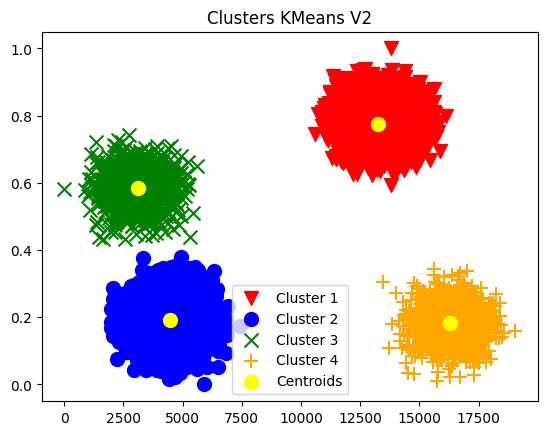

In [28]:
col = customer_df.to_numpy()

plt.scatter(col[kmeans_clusters_v2.labels_ == 0, 0], col[kmeans_clusters_v2.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(col[kmeans_clusters_v2.labels_ == 1, 0], col[kmeans_clusters_v2.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(col[kmeans_clusters_v2.labels_ == 2, 0], col[kmeans_clusters_v2.labels_ == 2, 1], s = 100, marker='x', c = 'green', label = 'Cluster 3')
plt.scatter(col[kmeans_clusters_v2.labels_ == 3, 0], col[kmeans_clusters_v2.labels_ == 3, 1], s = 100, marker='+', c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans_clusters_v2.cluster_centers_[:, 0], kmeans_clusters_v2.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters KMeans V2')
plt.legend()
plt.show()

Ahora si podemos ver que los centroides de los grupos estan ubicados lo más central posible dentro de cada grupo. Por lo que en conclusión decimos que hay 4 grupos de acuerdo con el algorimto de Kmeans.

Revisamos las importancias de cada grupo:

In [34]:
descripcion = customer_df.groupby("Cluster_KMeans").agg(["mean"])
descripcion

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,AVANCE_EFECTIVO,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE,Cluster_ward
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_KMeans,,,,,,,,,,,,,,,,
0,13252.473365,0.775734,40656.032468,6132.662569,37231.770958,0.227979,0.534946,0.660562,92.581049,206.825089,14534.185216,8548.249145,58146.385395,0.363650,9.859058,1.0
1,4451.126307,0.193317,29747.057865,35140.273594,11129.239338,0.567289,0.838328,0.134047,80.939451,85.725008,15523.980921,24623.728686,32951.234081,0.837494,6.363923,0.0
2,3105.917172,0.583910,26323.521692,31054.681489,9355.103901,0.797868,0.178405,0.876085,29.837209,284.805094,26109.000090,43726.525314,17429.339551,0.723273,10.598007,0.0
3,16285.111896,0.181718,7392.765979,31408.672313,21763.987743,0.702533,0.642639,0.660303,52.631841,166.533167,4386.390604,20649.435423,55187.141515,0.149516,7.826700,2.0


Teniendo en cuenta los 4 clusters podemos sacar características por cada uno de los clusters:


    0: Conformado por los clientes que más gastan en compras, pero que compran con baja frecuencia y tienen saldos altos, además son aquellos que tienen avances en efectivo y que son clientes desde hace 9-10 meses en promedio.

    1: Conformado por los clientes que tienen saldos bajos, pero realizan altos gastos en compras, que no realizan avances en efectivo frecuentemente y realizan la mayor cantidad de compras con plazo. Este grupo también esta conformado por aquellos que llevan menos tiempo siendo clientes, aproximadamente de 6 a 7 meses.

    2: Conformado por los clientes que menos saldo tienen, que más avances efectivos tienen, que tienen el mayor límite de crédito y los que menor cantidad de compras con plazo realizan. Son también los clientes que más pagos totales tienen y que tienen ya 10 o más meses siendo clientes.

    3: Conformado por los clientes con el mayor saldo, son también los que tienen el menor límite de crédito y los que menos gastan en compras que realizan. Estos clientes también suelen ser aquellos entre 7 a 8 meses.

# 6. Conclusiones

6.1 KMeans

Tras realizar el modelo con KMeans obtenemos que FinanzasAlpes tiene 4 tipos diferentes de clientes. En ellos se encuentran, los clientes que más gastan y tienen saldos altos. Los clientes que tienen saldos bajos, no realizan avances en efectivo constantemente y son los que tienen la mayor cantidad de compras con plazos. Los clientes que menos saldo tienen y realizan compras con frecuencia pero no a plazos. Y los clientes que tienen los mayores saldos y que menos compran.

6.2 Ward

6.3

6.4 General